# Import Libraries

In [74]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For statistical data visualization
import math  # For mathematical operations
import datetime  # For working with dates and times
import yfinance as yf  # For fetching financial data from Yahoo Finance
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler  # For scaling data
import keras  # For building and training neural networks
from keras.models import Sequential  # Sequential model for linear stack of layers
from keras.layers import Dense  # Fully connected layer
from keras.layers import SimpleRNN  # Simple Recurrent Neural Network layer
from keras.layers import Dropout  # Dropout layer for regularization
from keras.callbacks import EarlyStopping  # Callback for early stopping during training
# %load_ext google.colab.data_table  # Extension for displaying data tables in Colab

# Data Collection

we are using yahoo finance API to download data for past 10 year from the current date for stocks Apple, Walmart, Microsoft and Amazon

In [75]:
# Define the list of stock symbols
stocks = ['AAPL', 'WMT', 'MSFT', 'AMZN']
# Create a dictionary to store stock data for each symbol
stock_data_dict = {}
# Lists to store data for each stock
Apple_data = []
Microsoft_data = []
Walmart_data = []
Amazon_data = []
# Define the start and end dates for data retrieval
start_date = datetime.datetime.now() - pd.DateOffset(years=10)
end_date = datetime.datetime.now()
# Iterate through each stock symbol
for stock in stocks:
    # Download stock data using yfinance for the specified time period
    stock_data = yf.download(stock, start=start_date, end=end_date)
    # Store the stock data in the dictionary
    stock_data_dict[stock] = stock_data
    # Assign stock data to individual variables based on stock symbol
    if stock == 'AAPL':
        Apple_data = stock_data
    elif stock == 'MSFT':
        Microsoft_data = stock_data
    elif stock == 'WMT':
        Walmart_data = stock_data
    elif stock == 'AMZN':
        Amazon_data = stock_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [76]:
# Create a list of stock dataframes and corresponding stock names
stocks_data = [Apple_data, Microsoft_data, Walmart_data, Amazon_data]
stock_names = ['Apple', 'Microsoft', 'Walmart', 'Amazon']

# Data Exploration

In [77]:
# Check table information like column name, nullable, and data types for each stock
for stock_data, stock_name in zip(stocks_data, stock_names):
    # Print stock name
    print(f'Stock Name: {stock_name}')
    # Print DataFrame information
    print(f'DataFrame Info for {stock_name}:')
    print(stock_data.info())
    print('\n\n')  # Add newline for better readability

Stock Name: Apple
DataFrame Info for Apple:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2013-11-20 to 2023-11-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB
None



Stock Name: Microsoft
DataFrame Info for Microsoft:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2013-11-20 to 2023-11-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   floa

In [78]:
# Display stock dataframes for each stock
for stock_data, stock_name in zip(stocks_data, stock_names):
    # Print stock name
    print(f'Stock Name: {stock_name}')
    # Print DataFrame
    print(f'DataFrame {stock_name}:')
    print(stock_data)
    print('\n\n')  # Add newline for better readability

Stock Name: Apple
DataFrame Apple:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-11-20   18.543928   18.586430   18.368929   18.392857   16.124857   
2013-11-21   18.485714   18.614643   18.345358   18.612143   16.317106   
2013-11-22   18.554285   18.648571   18.518929   18.564285   16.275150   
2013-11-25   18.607857   18.781071   18.607143   18.705000   16.398512   
2013-11-26   18.718571   19.147858   18.714287   19.049999   16.700975   
...                ...         ...         ...         ...         ...   
2023-11-13  185.820007  186.029999  184.210007  184.800003  184.800003   
2023-11-14  187.699997  188.110001  186.300003  187.440002  187.440002   
2023-11-15  187.850006  189.500000  187.779999  188.009995  188.009995   
2023-11-16  189.570007  190.960007  188.649994  189.710007  189.710007   
2023-11-17  190.250000  190.380005  188.570007  189.690002  189.690002   

  

In [79]:
# Check null values for each stock
for stock_data, stock_name in zip(stocks_data, stock_names):
    # Print stock name
    print(f"Null check for {stock_name} stock:")
    # Print null values for each column
    print(stock_data.isna().sum())
    print("\n")  # Add newline for better readability

Null check for Apple stock:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Null check for Microsoft stock:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Null check for Walmart stock:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Null check for Amazon stock:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64




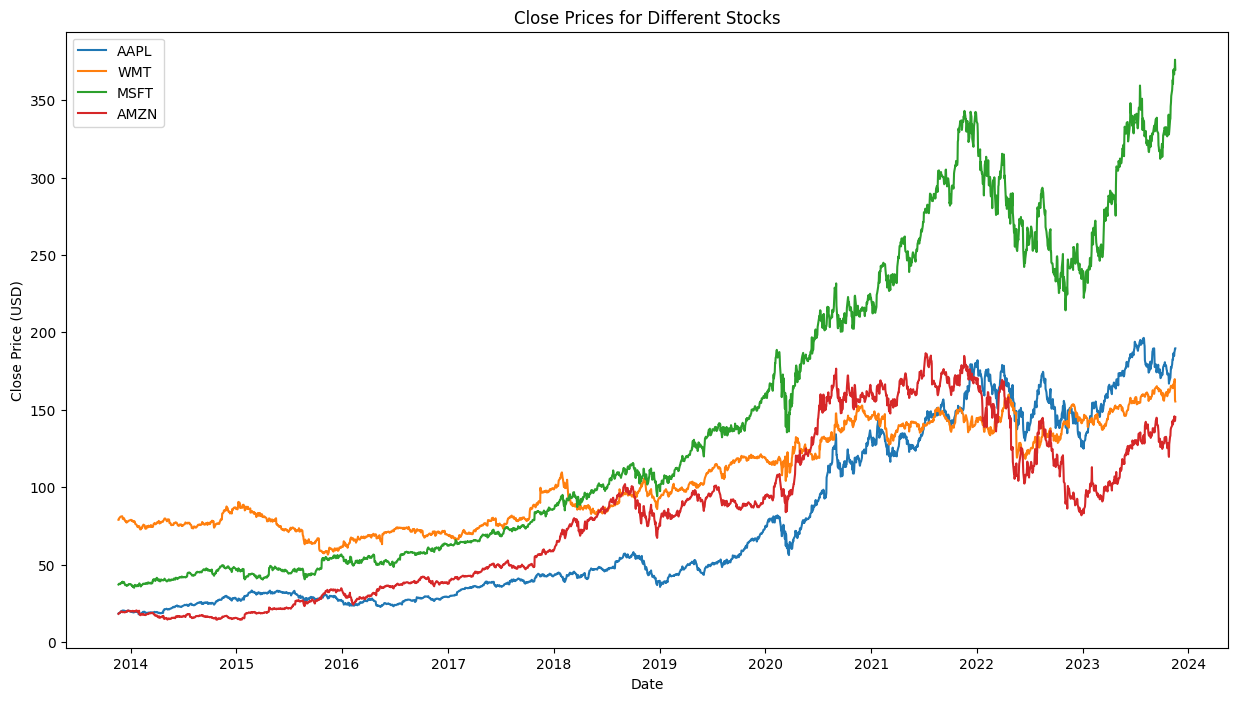

In [80]:
# Set the figure size for the plot
plt.figure(figsize=(15, 8))
# Iterate through each stock symbol in the list
for stock_symbol in stocks:
    # Access the stock data using the stock symbol as a key in the dictionary
    stock_data = stock_data_dict[stock_symbol]
    # Plot the Close prices over time
    plt.plot(stock_data.index, stock_data['Close'], label=stock_symbol)
# Set the title of the plot
plt.title('Close Prices for Different Stocks')
# Label the x-axis as 'Date'
plt.xlabel('Date')
# Label the y-axis as 'Close Price (USD)'
plt.ylabel('Close Price (USD)')
# Display a legend to identify each stock symbol
plt.legend()
# Show the plot
plt.show()

<Figure size 1600x800 with 0 Axes>

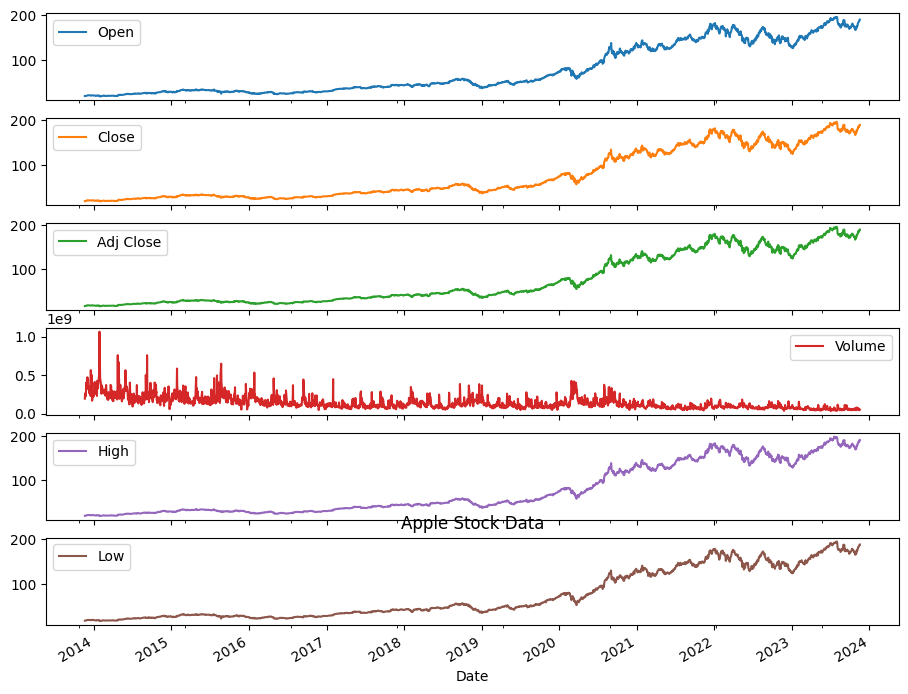

<Figure size 1600x800 with 0 Axes>

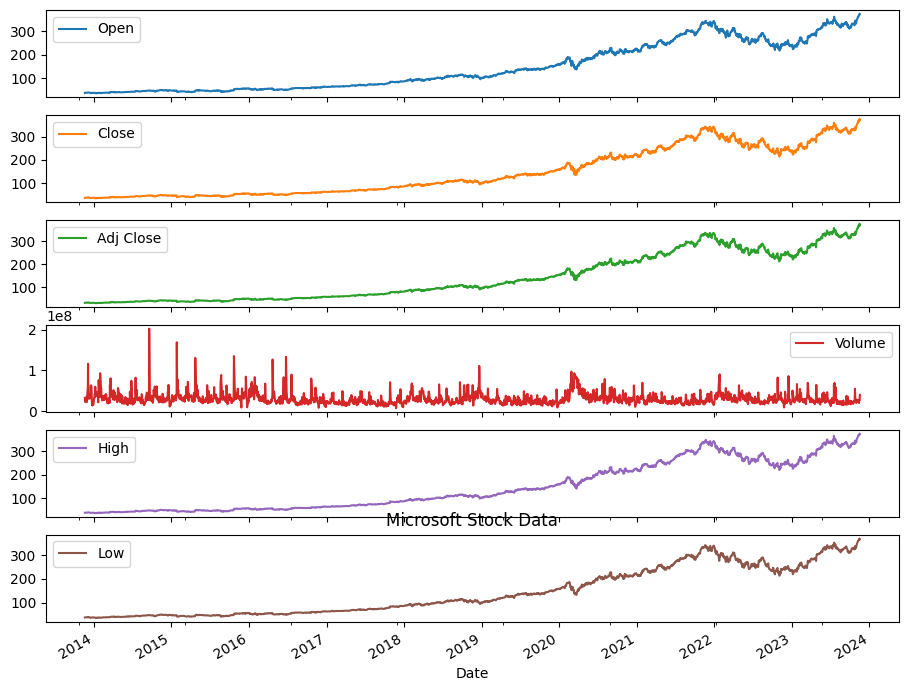

<Figure size 1600x800 with 0 Axes>

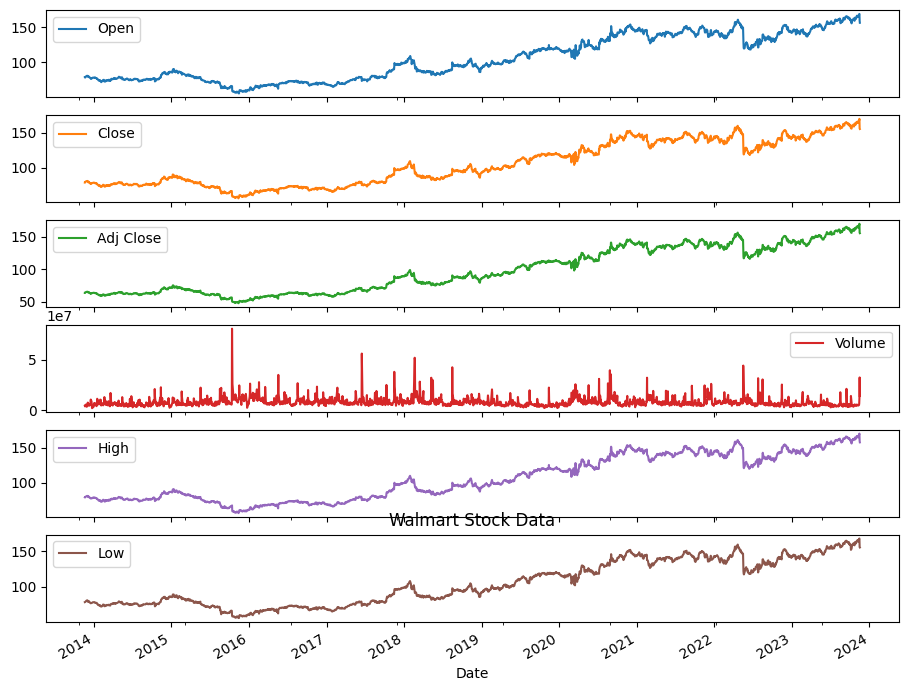

<Figure size 1600x800 with 0 Axes>

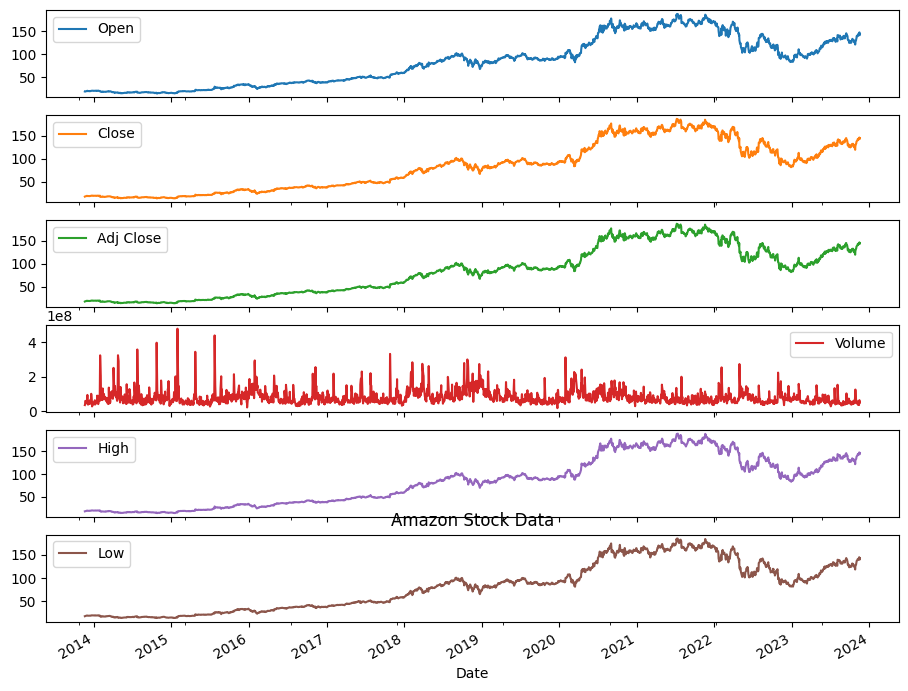

In [81]:
# Function to plot various stock data columns
def plot_stock_data(stock_data, stock_name):
    # Plotting the stock data for specified columns
    plt.figure(figsize=(16, 8))
    cols = ['Open', 'Close', 'Adj Close', 'Volume', 'High', 'Low']
    axes = stock_data[cols].plot(figsize=(11, 9), subplots=True)
    plt.title(f'{stock_name} Stock Data')  # Set the plot title
    plt.show()
# Iterate over each stock and plot its data
for stock_data, stock_name in zip(stocks_data, stock_names):
    plot_stock_data(stock_data, stock_name)


<ipython-input-82-328bd8215b48>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)
<ipython-input-82-328bd8215b48>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)
<ipython-input-82-328bd8215b48>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)
<ipython-input-82-328bd8215b48>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)


<Figure size 1500x1000 with 0 Axes>

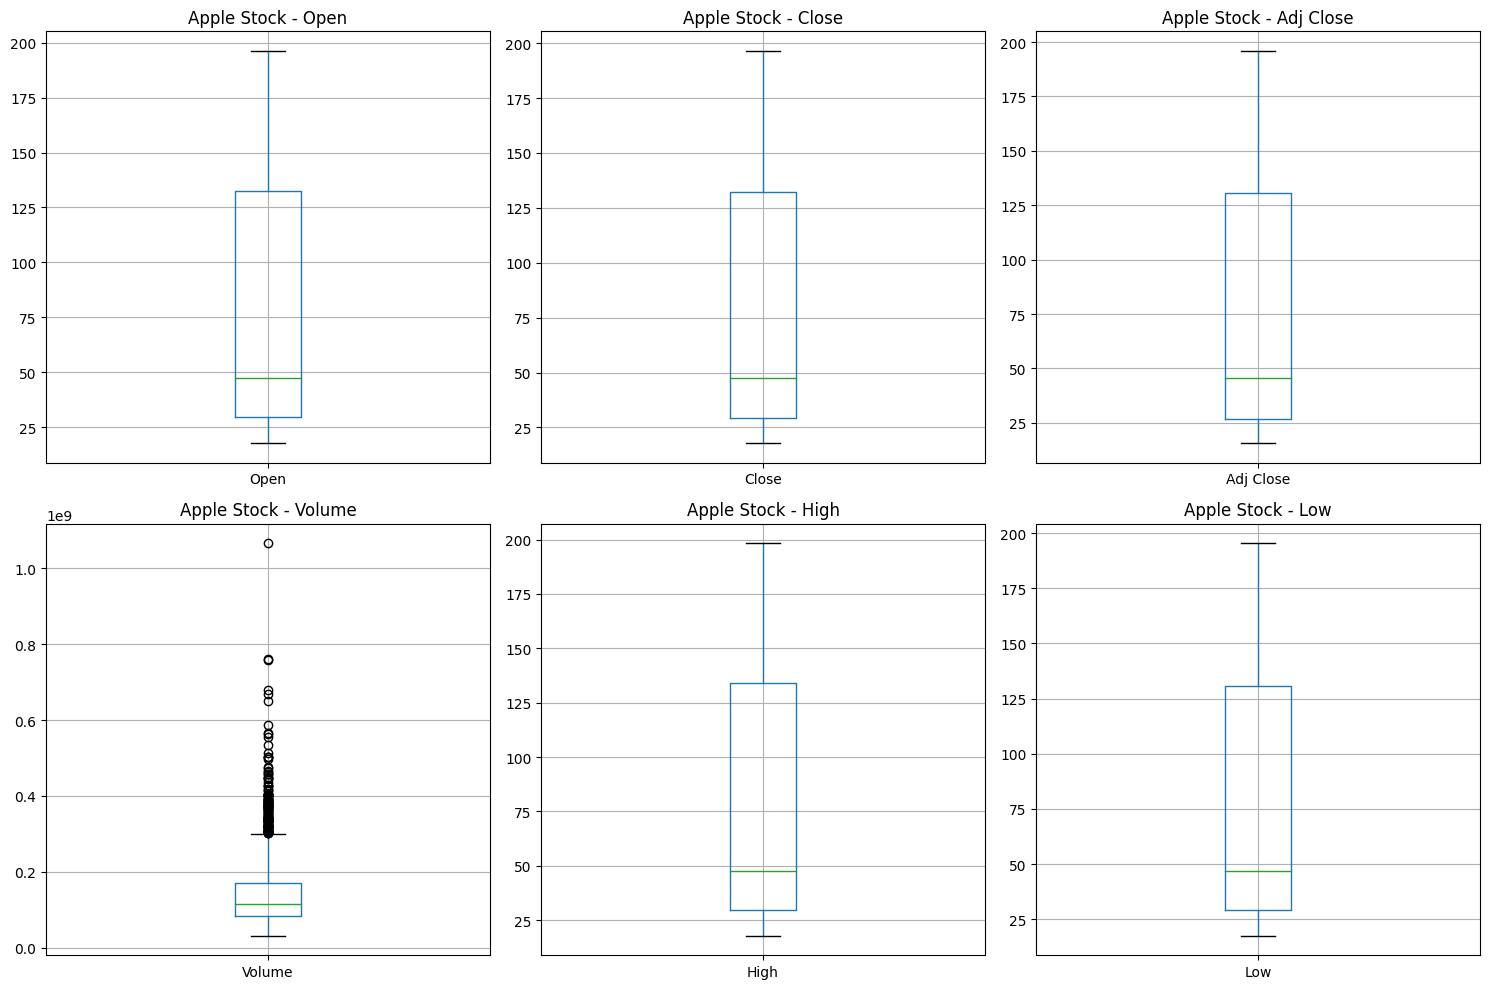

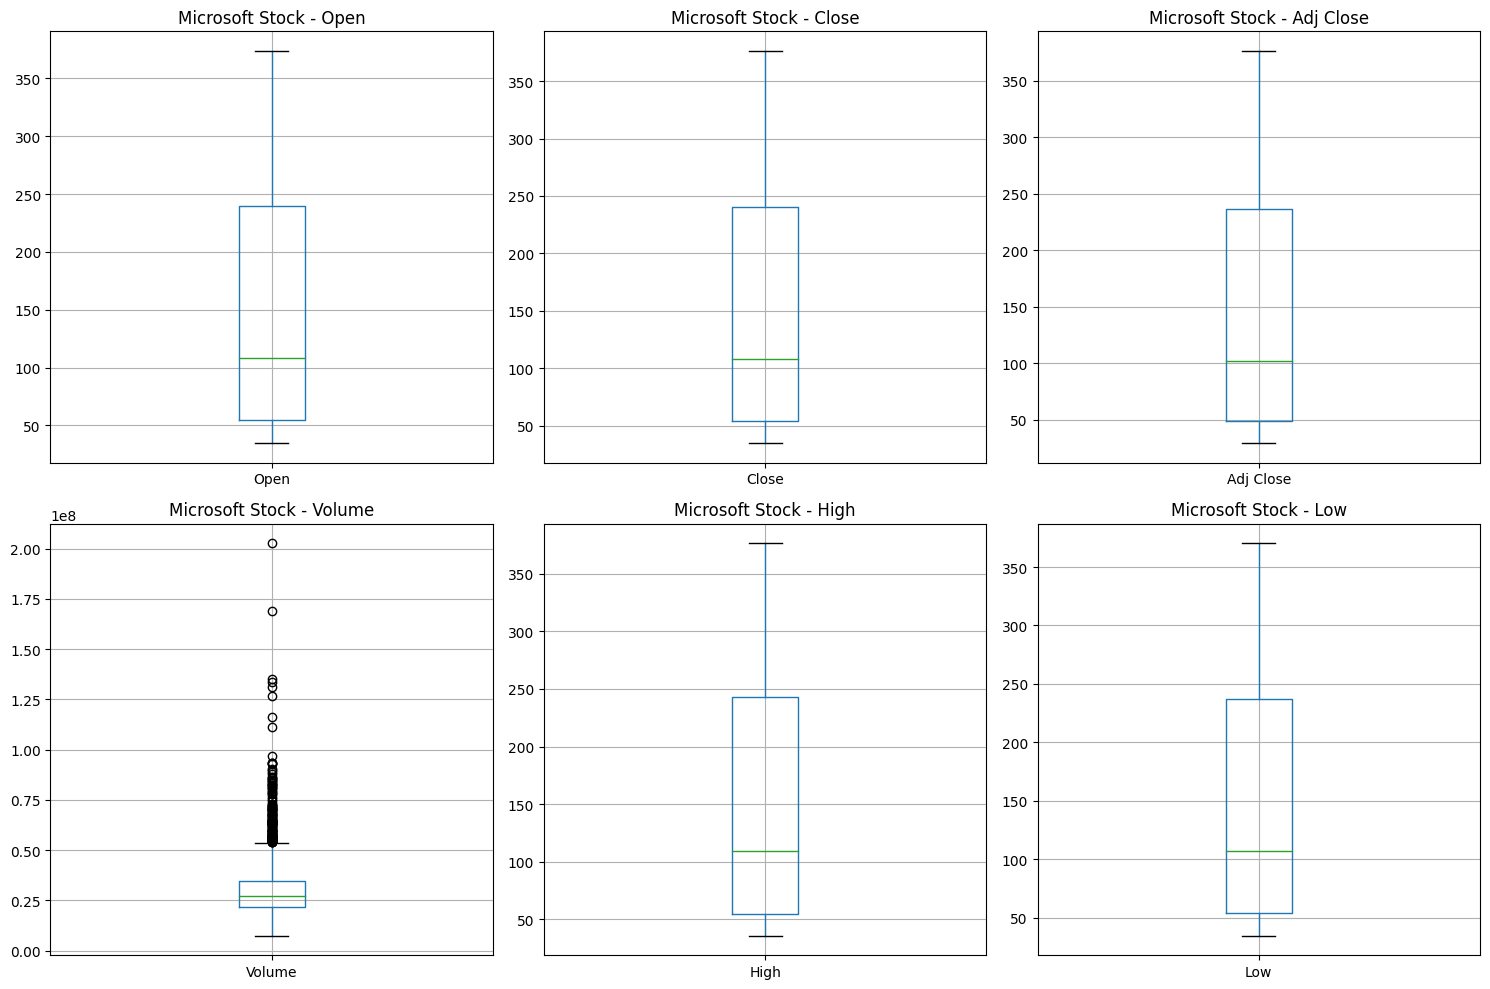

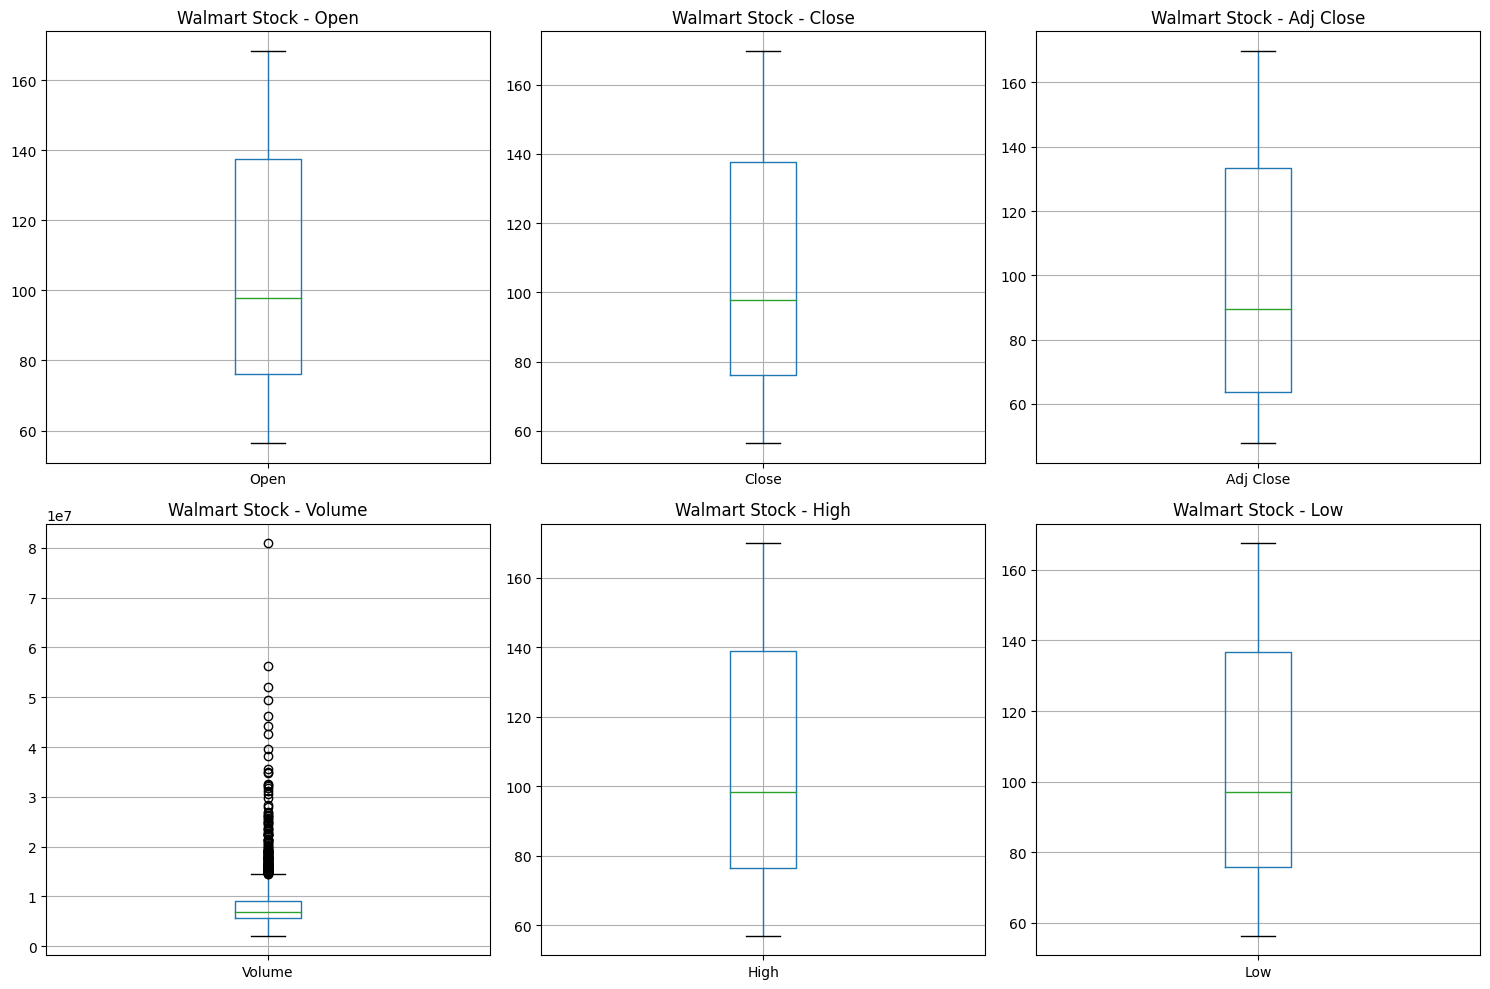

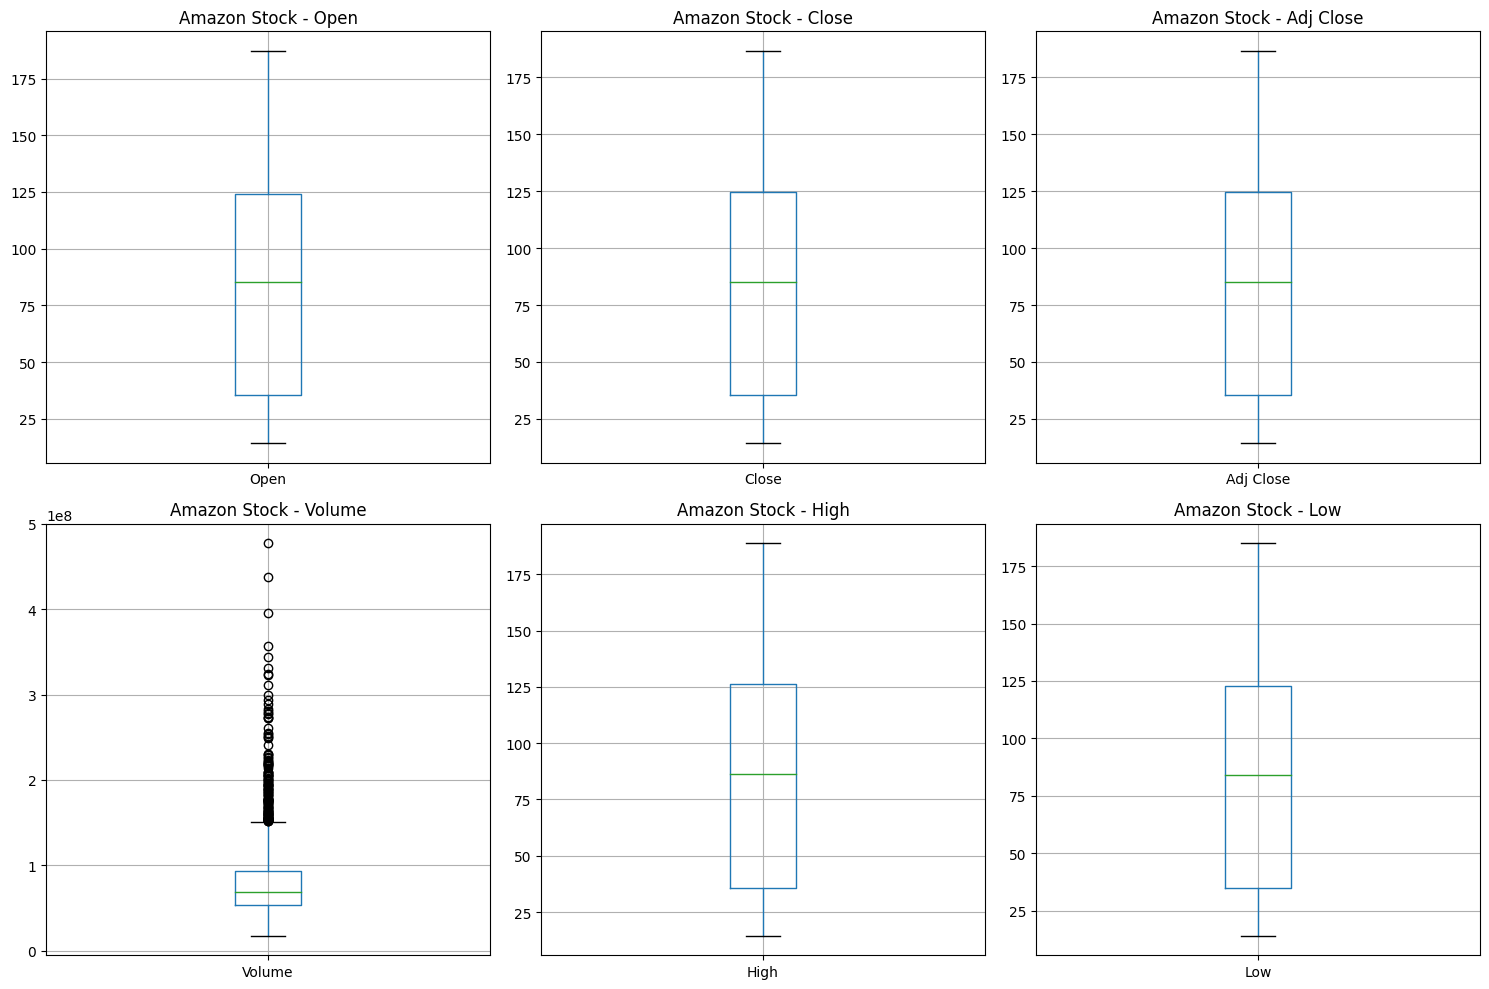

In [82]:
# Create a figure with a specified size
plt.figure(figsize=(15, 10))
# Iterate over each stock and create subplots for different data columns
for stock_data, stock_name in zip(stocks_data, stock_names):
    # Create subplots for each stock with a specified size
    plt.subplots(figsize=(15, 10))
    # Specify the columns to be used in the boxplots
    cols = ['Open', 'Close', 'Adj Close', 'Volume', 'High', 'Low']
    # Iterate over each column and create a subplot
    for i, col in enumerate(cols):
        plt.subplot(2, 3, i + 1)
        # Create a boxplot for the selected column
        stock_data.boxplot(column=[col])
        # Set the title for each subplot
        plt.title(f'{stock_name} Stock - {col}')
    # Adjust the layout for better presentation
    plt.tight_layout()
# Show the figure outside the outer loop
plt.show()

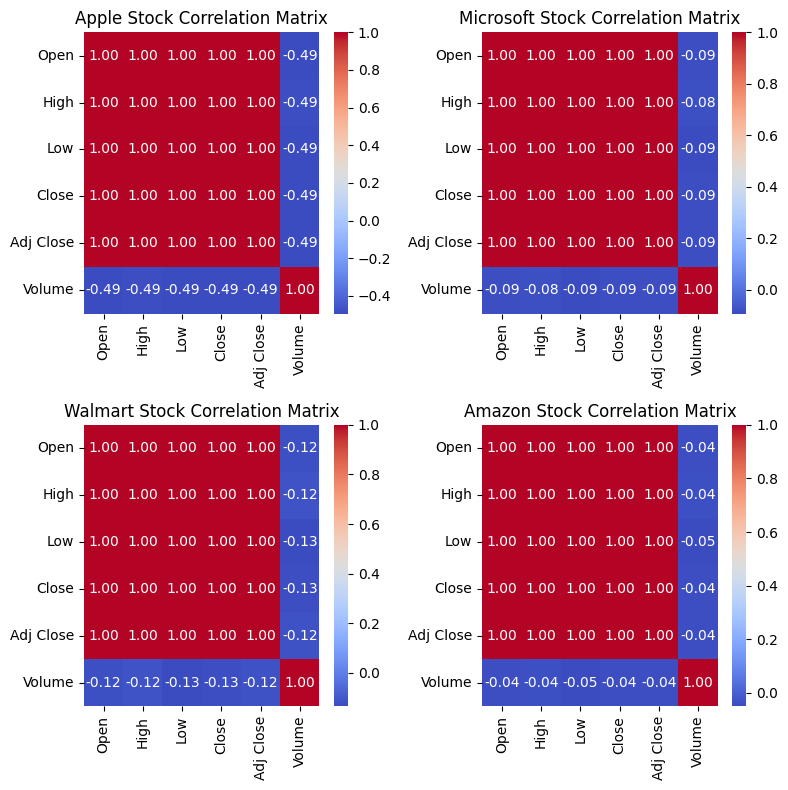

In [83]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
# Loop through each stock's data and plot the correlation heatmap in the corresponding subplot
for i, (stock_data, stock_name) in enumerate(zip(stocks_data, stock_names)):
    # Set the current subplot
    plt.subplot(2, 2, i + 1)
    # Create a heatmap of the correlation matrix
    sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    # Set the title of the subplot
    plt.title(f'{stock_name} Stock Correlation Matrix')
# Adjust layout to prevent overlapping
plt.tight_layout()
# Display the plot
plt.show()

# Data Preprocessing

We are removing Volume column from dataframe as it is not required for future predcition because price of stock is not depend on volume

In [84]:
# Define a function to preprocess stock data by dropping the 'Volume' column if present
def preprocess_stock_data(stock_data, stock_name):
    # Check if 'Volume' column is present in the DataFrame
    if 'Volume' in stock_data.columns:
        # Drop the 'Volume' column if present
        stock_data.drop('Volume', axis=1, inplace=True)
    # Print the updated DataFrame
    print(f'{stock_name} Stock Data after dropping "Volume" column:\n{stock_data}\n')
# Apply the preprocessing function to each DataFrame in the list
for stock_data, stock_name in zip(stocks_data, stock_names):
    preprocess_stock_data(stock_data, stock_name)

Apple Stock Data after dropping "Volume" column:
                  Open        High         Low       Close   Adj Close
Date                                                                  
2013-11-20   18.543928   18.586430   18.368929   18.392857   16.124857
2013-11-21   18.485714   18.614643   18.345358   18.612143   16.317106
2013-11-22   18.554285   18.648571   18.518929   18.564285   16.275150
2013-11-25   18.607857   18.781071   18.607143   18.705000   16.398512
2013-11-26   18.718571   19.147858   18.714287   19.049999   16.700975
...                ...         ...         ...         ...         ...
2023-11-13  185.820007  186.029999  184.210007  184.800003  184.800003
2023-11-14  187.699997  188.110001  186.300003  187.440002  187.440002
2023-11-15  187.850006  189.500000  187.779999  188.009995  188.009995
2023-11-16  189.570007  190.960007  188.649994  189.710007  189.710007
2023-11-17  190.250000  190.380005  188.570007  189.690002  189.690002

[2516 rows x 5 columns]

Mi

In this project our aim is to predict Close price for future based on Historical data, we will only consider Date and Close price from the Dataframe

In [85]:
# Create a list to store the final dataframes
final_dataframes = []
# Create a dictionary to store the selected data
selected_data_dict = {}

In [86]:
# Define a function to create the final DataFrame for stock data
def create_final_dataframe(stock_data, stock_name):
    # Check if 'Close' column is present in the DataFrame
    if 'Close' in stock_data.columns:
        # Create a new DataFrame with only the 'Close' column
        final_df = pd.DataFrame(stock_data['Close'].copy())
        print(f'{stock_name} Stock Final DataFrame:\n{final_df}\n')
        return final_df
    else:
        # Print a message if 'Close' column is not present
        print(f'{stock_name} Stock Data does not have a "Close" column.\n')
        return None

In [87]:
# Apply the create_final_dataframe function to each DataFrame in the list
for stock_data, stock_name in zip(stocks_data, stock_names):
    # Create the final DataFrame for the stock
    final_df = create_final_dataframe(stock_data, stock_name)
    # Check if the final DataFrame is created successfully
    if final_df is not None:
        # Append the final DataFrame to the list
        final_dataframes.append(final_df)
        # Store the 'Close' prices in the selected_data_dict
        selected_data_dict[stock_name] = final_df['Close']
# Print the selected 'Close' prices for each stock
for stock_name, close_prices in selected_data_dict.items():
    print(f'Close Prices for {stock_name} Stock:')
    print(close_prices)
    print('\n')

Apple Stock Final DataFrame:
                 Close
Date                  
2013-11-20   18.392857
2013-11-21   18.612143
2013-11-22   18.564285
2013-11-25   18.705000
2013-11-26   19.049999
...                ...
2023-11-13  184.800003
2023-11-14  187.440002
2023-11-15  188.009995
2023-11-16  189.710007
2023-11-17  189.690002

[2516 rows x 1 columns]

Microsoft Stock Final DataFrame:
                 Close
Date                  
2013-11-20   37.080002
2013-11-21   37.400002
2013-11-22   37.570000
2013-11-25   37.639999
2013-11-26   37.349998
...                ...
2023-11-13  366.679993
2023-11-14  370.269989
2023-11-15  369.670013
2023-11-16  376.170013
2023-11-17  369.850006

[2516 rows x 1 columns]

Walmart Stock Final DataFrame:
                 Close
Date                  
2013-11-20   78.900002
2013-11-21   78.860001
2013-11-22   79.809998
2013-11-25   80.430000
2013-11-26   80.680000
...                ...
2023-11-13  167.679993
2023-11-14  167.649994
2023-11-15  169.779999
2023

# Split Data into Train and Test

We are considering 25% of Data as Test dataset and rest is consider as Train Dataset

Calculate and Display Train and Test size for each stock

In [88]:
# Define the test size
test_size = 0.25
train_datasize = 0
test_datasize = 0
# Initialize the dictionary to store train and test sizes
data_sizes_dict = {}
# Calculate train and test sizes for each stock
for final_df, stock_name in zip(final_dataframes, stock_names):
    # Calculate the train size based on the test size
    train_datasize = round(len(final_df) * (1 - test_size))
    # Calculate the test size
    test_datasize = len(final_df) - train_datasize
    # Store train and test sizes in the dictionary
    data_sizes_dict[stock_name] = {'train_size': train_datasize, 'test_size': test_datasize}
# Print the calculated sizes
for stock_name, sizes in data_sizes_dict.items():
    print(f"{stock_name} Stock:")
    print(f"Train Data Size: {sizes['train_size']}")
    print(f"Test Data Size: {sizes['test_size']}\n")

Apple Stock:
Train Data Size: 1887
Test Data Size: 629

Microsoft Stock:
Train Data Size: 1887
Test Data Size: 629

Walmart Stock:
Train Data Size: 1887
Test Data Size: 629

Amazon Stock:
Train Data Size: 1887
Test Data Size: 629



Create dataframe of Train and Test for Each Stock

display shape of each stock of Train and Test

In [89]:
# Initialize dictionaries to store training and test sizes
train_sizes = {}
test_sizes = {}
# Iterate over final dataframes and stock names
for final_df, stock_name in zip(final_dataframes, stock_names):
    # Check if 'Close' column exists in the dataframe
    if 'Close' in final_df.columns:
        # Store training and test sizes in dictionaries
        train_sizes[stock_name] = train_datasize
        test_sizes[stock_name] = test_datasize
        # Extract training and test data
        stock_traindf = final_df.iloc[:train_datasize, :]
        stockdata_train = stock_traindf['Close'].values

        stock_testdf = final_df.iloc[train_datasize:, :]
        stockdata_test = stock_testdf['Close'].values

        # Print shapes of training and testing data
        print(f'{stock_name} Stock Training Data Shape:', stockdata_train.shape)
        print(f'{stock_name} Stock Testing Data Shape:', stockdata_test.shape)
    else:
        print(f'{stock_name} Stock Data does not have a "Close" column.\n')

# Print the training and test data sizes
for stock_name, train_size in train_sizes.items():
    print(f"{stock_name} Stock:")
    print(f"Train Data Size: {train_size}")
    print(f"Test Data Size: {test_sizes[stock_name]}\n")


Apple Stock Training Data Shape: (1887,)
Apple Stock Testing Data Shape: (629,)
Microsoft Stock Training Data Shape: (1887,)
Microsoft Stock Testing Data Shape: (629,)
Walmart Stock Training Data Shape: (1887,)
Walmart Stock Testing Data Shape: (629,)
Amazon Stock Training Data Shape: (1887,)
Amazon Stock Testing Data Shape: (629,)
Apple Stock:
Train Data Size: 1887
Test Data Size: 629

Microsoft Stock:
Train Data Size: 1887
Test Data Size: 629

Walmart Stock:
Train Data Size: 1887
Test Data Size: 629

Amazon Stock:
Train Data Size: 1887
Test Data Size: 629



Normalization

We use MinMaxscaler to Make range of close prices for all stocks between 0 to 1

In [90]:
# Apply scaling using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [91]:
# Initialize a dictionary to store scaled training data
scaled_train_data = {}

# Iterate over final dataframes and stock names
for final_df, stock_name in zip(final_dataframes, stock_names):
    # Check if 'Close' column exists in the dataframe
    if 'Close' in final_df.columns:

        # Extract training data and reshape for MinMaxScaler
        stock_traindf = final_df.iloc[:train_datasize, :]
        stockdata_train = stock_traindf['Close'].values.reshape(-1, 1)

        # Apply scaling using MinMaxScaler
        stocktrain_scaled = scaler.fit_transform(stockdata_train)

        # Store scaled data in the dictionary
        scaled_train_data[stock_name] = stocktrain_scaled

        # Print the shape of scaled training data
        print(f'{stock_name} Stock Scaled Training Data Shape:', stocktrain_scaled.shape)
    else:
        print(f'{stock_name} Stock Data does not have a "Close" column.\n')


Apple Stock Scaled Training Data Shape: (1887, 1)
Microsoft Stock Scaled Training Data Shape: (1887, 1)
Walmart Stock Scaled Training Data Shape: (1887, 1)
Amazon Stock Scaled Training Data Shape: (1887, 1)


# Creating X_train and y_train from Train dataset
In time series we need to Split data in sequencial format in order to predict Future values

we will predict the Next day Closing price based on Last 30 days close prices

This means, if I want to predict the Closing price of 31st day, I need to consider previous 30 day's Closing price

Data is consisting of Closing price on Daily basis
So, we have total 1702 rows for 1702 days.
First 30 Close prices (0 to 30) will be used to predict 31st day.
X_train and ytrain will be as below :

X_train[0] = [0:30](First 30 days closing price
y_train[0] = [30] (31st day Closing price)

X_train[1] = [1:30](Next 30 days closing price
y_train[1] = [31] (32ndt day Closing price) and so on.

In [92]:
# Initialize dictionaries to store X_train and y_train
X_train_dict = {}
y_train_dict = {}

# Iterate over stock names and scaled training data
for stock_name, stocktrain_scaled in scaled_train_data.items():
    # Initialize empty lists for X_train and y_train
    X_train = []
    y_train = []
    days_steps = 30

    # Generate sequences for X_train and y_train
    for i in range(days_steps, len(stocktrain_scaled)):
        X_train.append(stocktrain_scaled[i - days_steps: i, :])
        y_train.append(stocktrain_scaled[i, :])

    # Convert lists to arrays and store in dictionaries
    X_train_dict[stock_name] = np.array(X_train)
    y_train_dict[stock_name] = np.array(y_train)

    # Print shapes of X_train and y_train for the current stock
    print(f'{stock_name} Stock:')
    print("X_train shape:", X_train_dict[stock_name].shape)
    print("y_train shape:", y_train_dict[stock_name].shape)

    # Reshape y_train
    y_train_dict[stock_name] = y_train_dict[stock_name].reshape(y_train_dict[stock_name].shape[0], 1)
    print("y_train reshape:", y_train_dict[stock_name].shape)
    print('\n')


Apple Stock:
X_train shape: (1857, 30, 1)
y_train shape: (1857, 1)
y_train reshape: (1857, 1)


Microsoft Stock:
X_train shape: (1857, 30, 1)
y_train shape: (1857, 1)
y_train reshape: (1857, 1)


Walmart Stock:
X_train shape: (1857, 30, 1)
y_train shape: (1857, 1)
y_train reshape: (1857, 1)


Amazon Stock:
X_train shape: (1857, 30, 1)
y_train shape: (1857, 1)
y_train reshape: (1857, 1)




Build and compile model Simple RNN(Recurrent Neural Network)

In [93]:
# Create dictionaries to store models and training history for each stock
models_dict = {}
history_dict = {}

# Early stopping callback to prevent overfitting
es = EarlyStopping(monitor='loss', patience=5, verbose=1)

# Iterate over stock names
for stock_name in stock_names:
    # Retrieve X_train and y_train for the current stock
    X_train = X_train_dict[stock_name]
    y_train = y_train_dict[stock_name]

    # initialize the model
    model = Sequential()

    # Input Layer (input shape is 30X1 (days interval x features))
    model.add(SimpleRNN(units=50, return_sequences=True, activation='tanh',
                        input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))

    model.add(SimpleRNN(units=50, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.2))

    model.add(SimpleRNN(units=50))
    model.add(Dropout(0.2))

    # adding output layer
    model.add(Dense(units=1))
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    models_dict[stock_name] = model

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[es])
    history_dict[stock_name] = history

    # Print model summary for the current stock
    print(f'{stock_name} Stock Model Summary:')
    model.summary()
    print('\n')


Epoch 1/100
59/59 [==============================] - 4s 23ms/step - loss: 0.1531
Epoch 2/100
59/59 [==============================] - 2s 26ms/step - loss: 0.0425
Epoch 3/100
59/59 [==============================] - 2s 38ms/step - loss: 0.0243
Epoch 4/100
59/59 [==============================] - 2s 38ms/step - loss: 0.0179
Epoch 5/100
59/59 [==============================] - 1s 23ms/step - loss: 0.0135
Epoch 6/100
59/59 [==============================] - 1s 24ms/step - loss: 0.0096
Epoch 7/100
59/59 [==============================] - 1s 23ms/step - loss: 0.0153
Epoch 8/100
59/59 [==============================] - 1s 23ms/step - loss: 0.0084
Epoch 9/100
59/59 [==============================] - 1s 23ms/step - loss: 0.0066
Epoch 10/100
59/59 [==============================] - 1s 23ms/step - loss: 0.0062
Epoch 11/100
59/59 [==============================] - 1s 23ms/step - loss: 0.0058
Epoch 12/100
59/59 [==============================] - 2s 34ms/step - loss: 0.0044
Epoch 13/100
59/59 [=====

# Evaluate Model Results

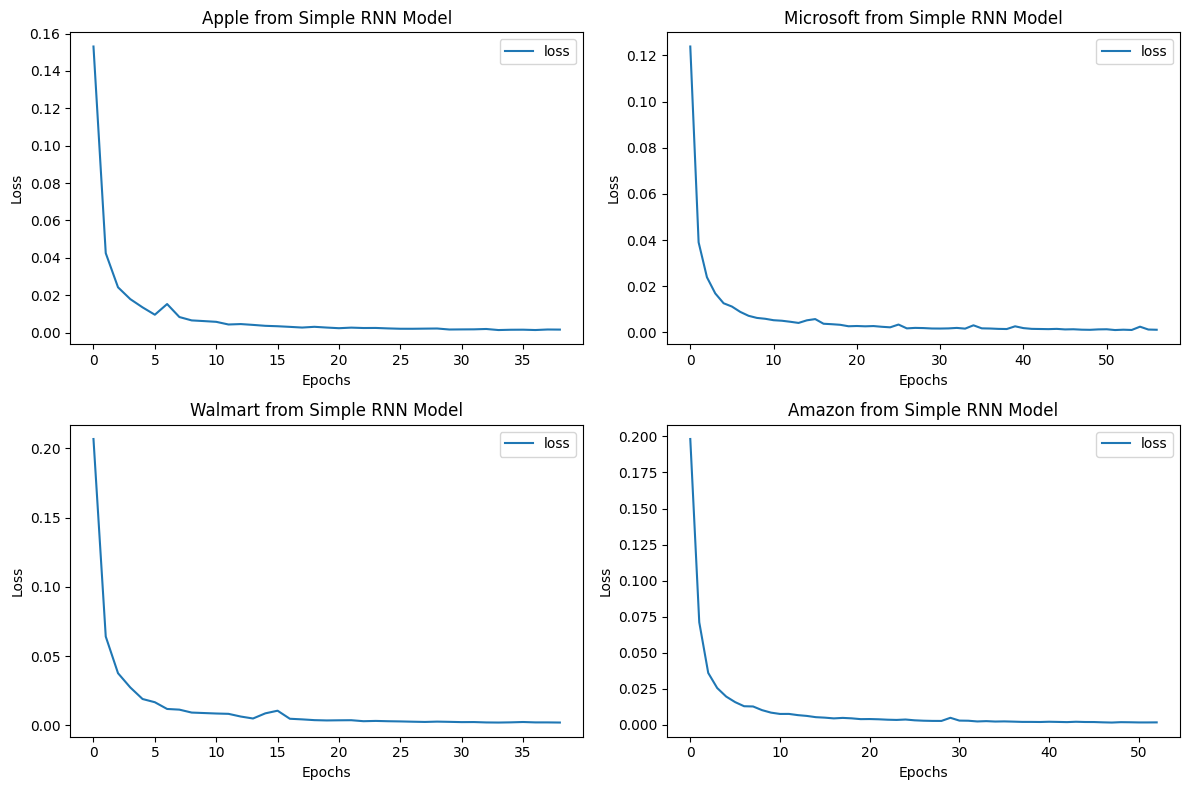

In [94]:
# Create subplots for loss visualization
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs = axs.flatten()
# Iterate over stock names
for i, stock_name in enumerate(stock_names):
    history = history_dict[stock_name]
    # Plot training loss
    axs[i].plot(history.epoch, history.history["loss"], label='loss')
    axs[i].set_title(f'{stock_name} from Simple RNN Model')
    axs[i].set_xlabel("Epochs")
    axs[i].set_ylabel("Loss")
    axs[i].legend()
# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# View Results

59/59 [==============================] - 1s 11ms/step


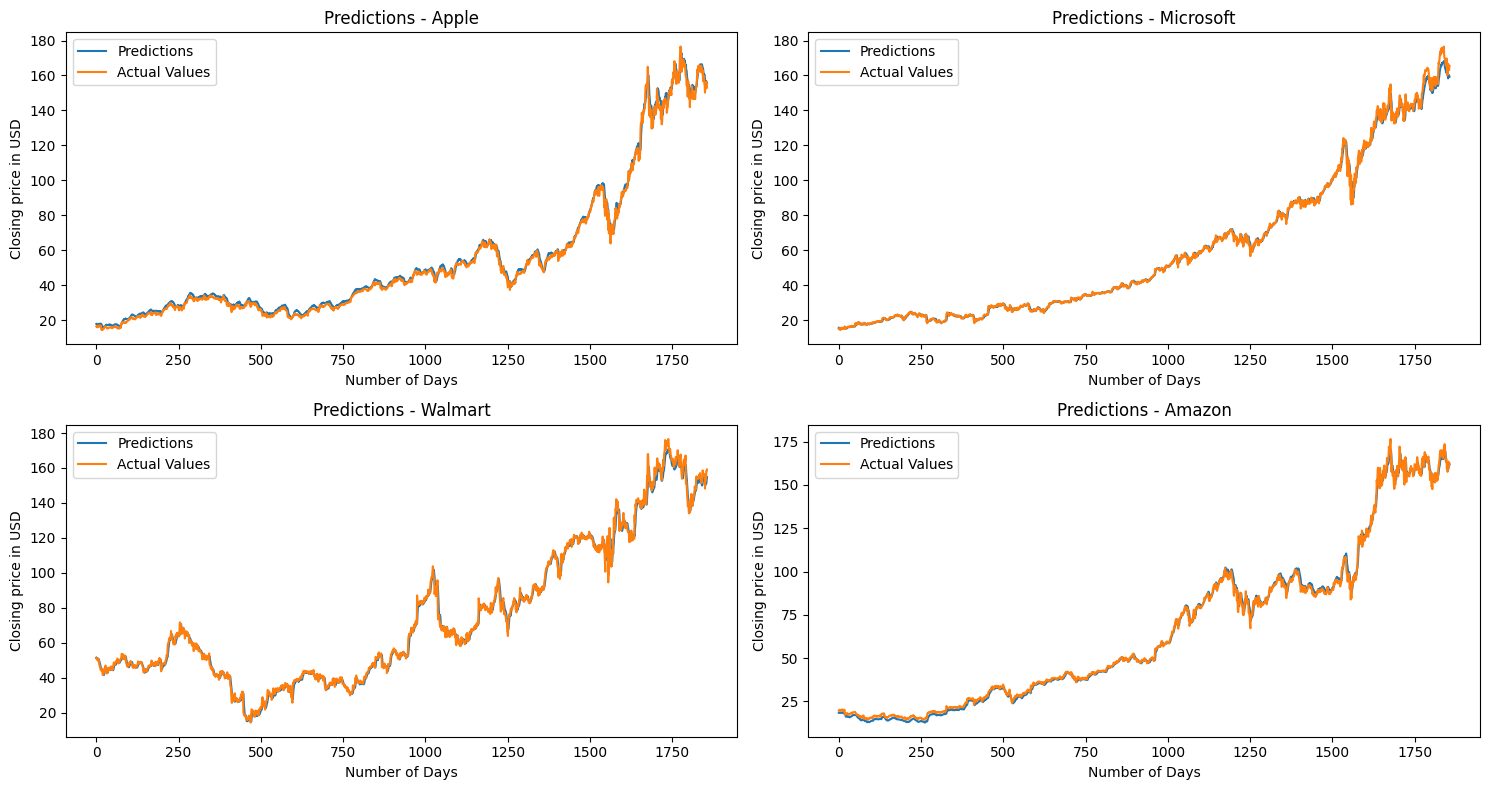

In [95]:
# Create subplots for prediction visualization
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
axs = axs.flatten()
# Iterate over stock names
for i, stock_name in enumerate(stock_names):
    model = models_dict[stock_name]
    X_train = X_train_dict[stock_name]
    y_train = y_train_dict[stock_name]

    # Predict the data from X_train
    y_pred = model.predict(X_train)

    # Convert predictions back to the original scale
    y_pred = scaler.inverse_transform(y_pred.reshape(1, -1))

    # Reshape the prediction shape to compare with training data
    y_pred = np.reshape(y_pred, (y_pred.shape[1], 1))

    # Convert y_train back to the original scale
    y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Plot predictions and actual values
    axs[i].plot(y_pred, label='Predictions')
    axs[i].plot(y_train_original, label='Actual Values')
    axs[i].set_xlabel("Number of Days")
    axs[i].set_ylabel("Closing price in USD")
    axs[i].set_title(f'Predictions - {stock_name}')
    axs[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
